# Youtube-India-Trending-Videos Analysis

In this analysis I have used kaggle dataset of trending YouTube videos for Indian region. YouTube is one the largest and most used video sharing platform. I am trying to analyse some general trends on this dataset. Personally, I spend a huge amount of my time on YouTube for entertainment, education and many other purposes and thats why i chose this dataset. I have used some popular python libraries such as numpy, pandas, matplotlib and seaborn for this analysis. 

## First step is to download the nescessary data.

I downloaded the youtube dataset for indian region. I used csv file and json file to perform analysis. 

In [2]:
!pip install jovian opendatasets --upgrade --quiet

In [5]:
project_name = "youtube-trending-videos-analysis" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [6]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "rijulbathla8/youtube-trending-videos-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rijulbathla8/youtube-trending-videos-analysis


'https://jovian.ml/rijulbathla8/youtube-trending-videos-analysis'

## Data Preparation and Cleaning

First i uploaded the dataset into jupyter notebook and had a look at it. I use some basic pandas operations to try to understand the data better. We drop the columns which we will not need in the dataset for this analysis. Then we clean the data for missing values and change the format of some columns into required one. After doing this we will begin with the exploratory analysis as the data is cleaned now. 




In [7]:
# Importing all the libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
yt_trend_df = pd.read_csv('INvideos.csv')
yt_in_categories = pd.read_json('IN_category_id.json')

In [12]:
# To have a first look at first 5 rows of the data
yt_trend_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [13]:
# to get the columns in the orginal dataset
yt_trend_df.columns


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [15]:
# Removing the columns that are not required in this analysis
yt_trend_df.drop(columns=['thumbnail_link','comments_disabled'],inplace=True)
yt_trend_df.drop(columns=['tags'],inplace=True)
yt_trend_df.drop(columns=['video_error_or_removed','ratings_disabled','description'],inplace=True)

In [16]:
# As seen from the sample, i only have category_id and to get the names for categories i use json file

In [17]:
categories = {category['id']: category['snippet']['title'] for category in yt_in_categories['items']}
yt_trend_df.insert(4, 'category', yt_trend_df['category_id'].astype(str).map(categories))

In [18]:
##Lets call the info() function to get the basic information of the data frame like total number of columns with nam ,data types etc.

yt_trend_df.info()

## .shape gives the tuple of the rows and the columns 

yt_trend_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37352 non-null  object
 1   trending_date  37352 non-null  object
 2   title          37352 non-null  object
 3   channel_title  37352 non-null  object
 4   category       37247 non-null  object
 5   category_id    37352 non-null  int64 
 6   publish_time   37352 non-null  object
 7   views          37352 non-null  int64 
 8   likes          37352 non-null  int64 
 9   dislikes       37352 non-null  int64 
 10  comment_count  37352 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.1+ MB


(37352, 11)

In [19]:
## let find the nunique values in the data frame,it ignores the nan values


yt_trend_df.nunique()

video_id         16307
trending_date      205
title            16721
channel_title     1426
category            16
category_id         17
publish_time     16339
views            32136
likes            15529
dislikes          5079
comment_count     6027
dtype: int64

In [20]:
# Removing the duplicates 

yt_trend_df = yt_trend_df.sort_values(['video_id','views'], ascending =[True,False]).drop_duplicates(['video_id']).reset_index(drop=True)

In [21]:
yt_trend_df.head()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,views,likes,dislikes,comment_count
0,#NAME?,17.22.12,PADMAN Official Trailer | Akshay Kumar | Sonam...,Sony Pictures India,Entertainment,24,2017-12-15T05:27:25.000Z,28080774,450360,26383,29837
1,#VALUE!,18.12.03,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,27,2018-03-08T07:03:27.000Z,258163,8991,430,640
2,-0N9r10xb_0,17.20.11,19 नवंबर शनि अमावस्या के अगले दिन बड़ा रविवार ब...,Magical Nuskhe,Howto & Style,26,2017-11-18T14:20:54.000Z,133438,1381,208,39
3,-0WuM6ctLHg,18.13.02,மிரளவைக்கும் 5 நம்பமுடியாத கண்டுபிடிப்புகள் | ...,Kollywood Talk,People & Blogs,22,2018-02-10T08:07:15.000Z,333432,4086,161,96
4,-0mcgX4ro7I,18.17.03,Bhabi Ji Ghar Par Hain - भाबीजी घर पर हैं - Ep...,And TV,Entertainment,24,2018-03-15T00:28:23.000Z,245666,1169,134,79


In [23]:
# Checking for null values

yt_trend_df.isnull().sum()


video_id          0
trending_date     0
title             0
channel_title     0
category         69
category_id       0
publish_time      0
views             0
likes             0
dislikes          0
comment_count     0
dtype: int64

In [24]:
# Replacing the null with miscellaneous in the category column 

null_df = yt_trend_df[yt_trend_df["category"].isnull()] 

In [25]:
yt_trend_df["category"].fillna("Miscellaneous", inplace = True) 
yt_trend_df[yt_trend_df["category_id"]  == 29]

,video_id,trending_date,title,channel_title,category,category_id,publish_time,views,likes,dislikes,comment_count
20,-2t-dA15iVU,17.04.12,ANUGRAH TV 03-12-2017 A NEW BEGINNING DAY-2 Su...,Ankur Narula Ministries,Miscellaneous,29,2017-12-03T12:02:34.000Z,15338,877,24,146
214,0eSiddTE0Oo,18.15.02,Mahashivratri 2018 Celebrations with Gurudev S...,Sri Sri Ravi Shankar,Miscellaneous,29,2018-02-13T18:02:03.000Z,112423,3307,108,0
731,2eiBztJHjBY,17.18.11,ਅਸੀਂ ਜਥੇਦਾਰਾਂ ਨੂੰ ਸੀਡੀਆਂ ਨਹੀਂ ਭੇਜਣੀਆਂ | Assi J...,Emm Pee,Miscellaneous,29,2017-11-15T15:31:16.000Z,89196,0,0,0
1116,408bdj7PN18,18.12.01,Gurudev: On the Plateau of the Peak,Sri Sri Ravi Shankar,Miscellaneous,29,2018-01-11T15:55:58.000Z,11864,801,11,4
1326,4r4rErKcQeU,17.20.11,ANUGRAH TV- 19-11-2017 Sunday Meeting Live Stream,Ankur Narula Ministries,Miscellaneous,29,2017-11-19T12:12:47.000Z,12808,719,13,60
...,...,...,...,...,...,...,...,...,...,...,...
15642,xCmxRn0cj-E,18.14.03,Full Diwan | Rampura Phul | Day 2 | 11 March 2...,Emm Pee,Miscellaneous,29,2018-03-11T18:05:33.000Z,56981,0,0,0
15743,xfBptMVQy4g,18.07.05,LIVE STREAMING | Parmeshar Dwar Monthly Diwan ...,Emm Pee,Miscellaneous,29,2018-05-05T19:27:38.000Z,77914,2685,126,0
15827,xzEbOteUiRY,17.15.11,"ਅੰਮ੍ਰਿਤਸਰ” ਵਿੱਚ ਦੀਵਾਨ ਲਗਾਉਣਾ ਸਾਡਾ ਮਕਸਦ ਨਹੀਂ, ਸ...",Emm Pee,Miscellaneous,29,2017-11-12T22:34:25.000Z,73442,0,0,0
16105,z4aeaw3BH8Y,17.18.11,इसी जन्म में अगले जन्म का इंश्योरेंस - Story ...,Sri Sri Ravi Shankar,Miscellaneous,29,2017-11-16T16:13:49.000Z,17699,1225,4,23


In [26]:
# Adding some additional columns

yt_trend_df['ld_ratio'] = yt_trend_df.likes/yt_trend_df.dislikes  # Likes to dislike ratio
yt_trend_df['react_no(%age)'] = ((yt_trend_df.likes + yt_trend_df.dislikes +yt_trend_df.comment_count)/yt_trend_df.views)*100 
# ratio of the number of people that reacted(liked, disliked or commented) on the video

In [27]:
yt_trend_df.head()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,views,likes,dislikes,comment_count,ld_ratio,react_no(%age)
0,#NAME?,17.22.12,PADMAN Official Trailer | Akshay Kumar | Sonam...,Sony Pictures India,Entertainment,24,2017-12-15T05:27:25.000Z,28080774,450360,26383,29837,17.070083,1.804010
1,#VALUE!,18.12.03,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,27,2018-03-08T07:03:27.000Z,258163,8991,430,640,20.909302,3.897150
2,-0N9r10xb_0,17.20.11,19 नवंबर शनि अमावस्या के अगले दिन बड़ा रविवार ब...,Magical Nuskhe,Howto & Style,26,2017-11-18T14:20:54.000Z,133438,1381,208,39,6.639423,1.220042
3,-0WuM6ctLHg,18.13.02,மிரளவைக்கும் 5 நம்பமுடியாத கண்டுபிடிப்புகள் | ...,Kollywood Talk,People & Blogs,22,2018-02-10T08:07:15.000Z,333432,4086,161,96,25.378882,1.302514
4,-0mcgX4ro7I,18.17.03,Bhabi Ji Ghar Par Hain - भाबीजी घर पर हैं - Ep...,And TV,Entertainment,24,2018-03-15T00:28:23.000Z,245666,1169,134,79,8.723881,0.562552


In [29]:
# taking care of ld ratio null values

yt_trend_df['ld_ratio'].fillna(0,inplace = True) 

In [30]:
# Changing date format to datetime64 format

yt_trend_df.publish_time = yt_trend_df.publish_time.str.split('T').str[0].str.strip()

# To get publish date in the correct format
yt_trend_df['p_date'] = pd.to_datetime(yt_trend_df['publish_time'])

# To get the trending date in correct format
yt_trend_df['t_date'] = pd.to_datetime(yt_trend_df['trending_date'],format='%y.%d.%m')

# To have an additional column as the days to reach the trending list
yt_trend_df['days_till_trend'] = yt_trend_df['t_date'] - yt_trend_df['p_date']

In [32]:
# to have days in int format
yt_trend_df['days'] = yt_trend_df.days_till_trend.dt.days

# also having an index as an column
yt_trend_df['index'] = yt_trend_df.index + 1

In [38]:
# Using describe() to get some statistics on numeric data.

yt_trend_df.describe()

,category_id,views,likes,dislikes,comment_count,ld_ratio,react_no(%age),days_till_trend,days,index
count,16307.000000,1.630700e+04,1.630700e+04,1.630700e+04,16307.000000,1.630700e+04,16307.000000,16307,16307.000000,16307.000000
mean,22.396946,6.853477e+05,1.448582e+04,9.589194e+02,1484.703992,inf,2.187645,2 days 07:07:02.763230514,2.296560,8154.000000
std,5.932382,2.372791e+06,6.704034e+04,1.264481e+04,10413.870727,NaN,3.100099,2 days 04:57:21.307599561,2.206497,4707.569755
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0 days 00:00:00,0.000000,1.000000
25%,23.000000,8.859200e+04,5.610000e+02,6.900000e+01,47.000000,4.551014e+00,0.499550,1 days 00:00:00,1.000000,4077.500000
50%,24.000000,2.058000e+05,1.744000e+03,1.940000e+02,195.000000,8.932476e+00,0.936234,2 days 00:00:00,2.000000,8154.000000
75%,25.000000,5.295160e+05,6.460000e+03,5.910000e+02,700.000000,1.978354e+01,2.543294,3 days 00:00:00,3.000000,12230.500000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,807558.000000,inf,65.245867,221 days 00:00:00,221.000000,16307.000000


Dataset is cleaned and preprocessed to be used for exploratory analysis

In [33]:
import jovian

In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rijulbathla8/youtube-trending-videos-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rijulbathla8/youtube-trending-videos-analysis


'https://jovian.ml/rijulbathla8/youtube-trending-videos-analysis'

## Exploratory Analysis and Visualization

In this section we ask interesting questions to analyze the data and draw some conclusions based on the plots between different variables.


In [57]:
import matplotlib
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

A simple plot between views and likes

Text(0.5, 1.0, 'Views vs Likes')

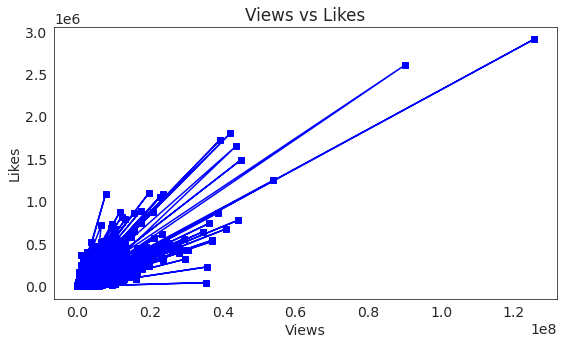

In [82]:
plt.plot(yt_trend_df['views'],yt_trend_df['likes'],'s-b');

plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Views vs Likes')

Scatter plot for better visualization

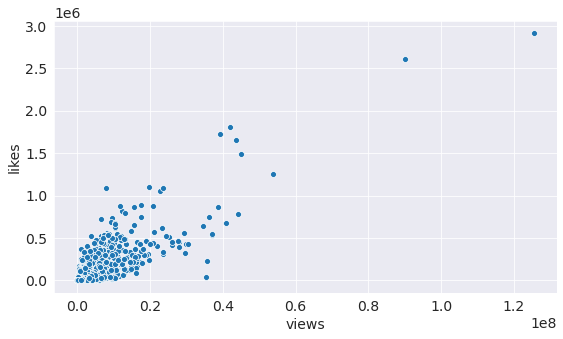

In [39]:
sns.scatterplot('views','likes',data=yt_trend_df);

In [83]:
# To get day wise distribution
yt_trend_df.groupby('days_till_trend')[['title']].count()

,title
days_till_trend,
0 days,138
1 days,5130
2 days,5327
3 days,3096
4 days,1515
5 days,783
6 days,220
7 days,57
8 days,18


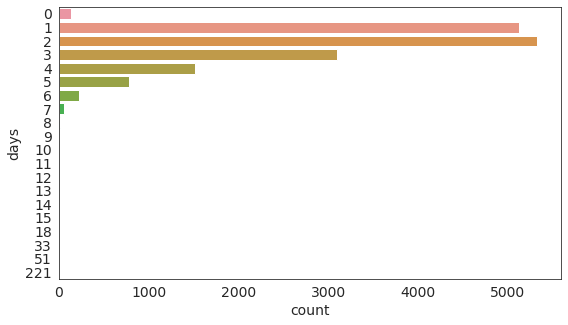

In [84]:
sns.countplot(y= yt_trend_df.days) ;

In [44]:
yt_trend_df['p_month'] = pd.DatetimeIndex(yt_trend_df.p_date).month

In [45]:
yt_trend_df.groupby('p_month')['title'].count()

p_month
1     2644
2     2258
3     2340
4     1685
5     2019
6      823
11    1747
12    2791
Name: title, dtype: int64

<AxesSubplot:xlabel='count', ylabel='p_month'>

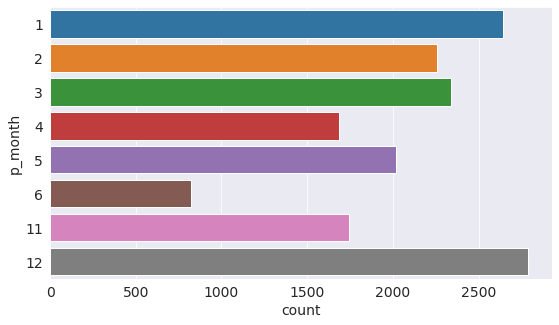

In [46]:
sns.countplot(y = yt_trend_df.p_month)

### Above figure shows the most trending videos are in the month of December

In [85]:
yt_trend_df.groupby('category')['title'].count()

category
Autos & Vehicles          34
Comedy                  1114
Education                798
Entertainment           7547
Film & Animation         522
Gaming                    20
Howto & Style            478
Miscellaneous             69
Movies                     2
Music                   1213
News & Politics         2505
People & Blogs          1232
Pets & Animals             1
Science & Technology     300
Shows                    121
Sports                   347
Travel & Events            4
Name: title, dtype: int64

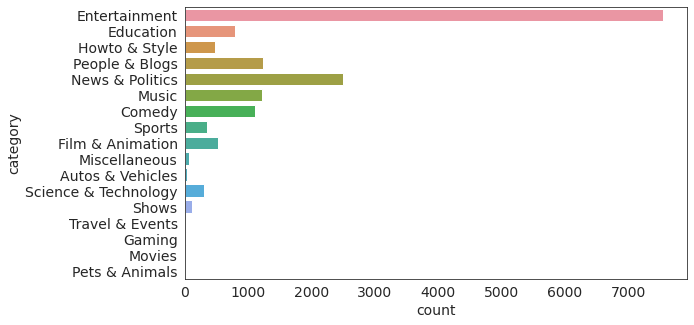

In [86]:
sns.countplot(y = yt_trend_df.category);

### Most popular catogory is Entertainment followed by news and then music.

In [50]:
# To get the views per day

yt_trend_df.loc[(yt_trend_df['days'] < 1), 'days'] = 1
yt_trend_df["views_per_day"] = yt_trend_df["views"].astype(int) / yt_trend_df["days"]

In [51]:
yt_trend_df['days'] = yt_trend_df.days_till_trend.dt.days

In [52]:
yt_trend_df['p_day'] = yt_trend_df.p_date.dt.day

In [53]:
yt_trend_df.groupby('p_day')['title'].count()

p_day
1     536
2     568
3     546
4     497
5     547
6     545
7     491
8     459
9     426
10    498
11    554
12    564
13    601
14    512
15    583
16    627
17    547
18    512
19    530
20    583
21    535
22    610
23    576
24    597
25    552
26    550
27    533
28    486
29    476
30    420
31    246
Name: title, dtype: int64

<AxesSubplot:xlabel='count', ylabel='p_day'>

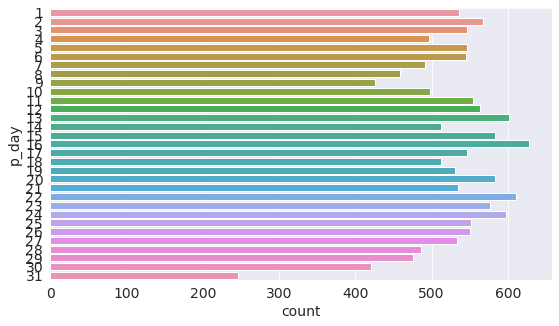

In [54]:
sns.countplot(y = yt_trend_df.p_day)

## Heat map showing the correlations between dataset variables.

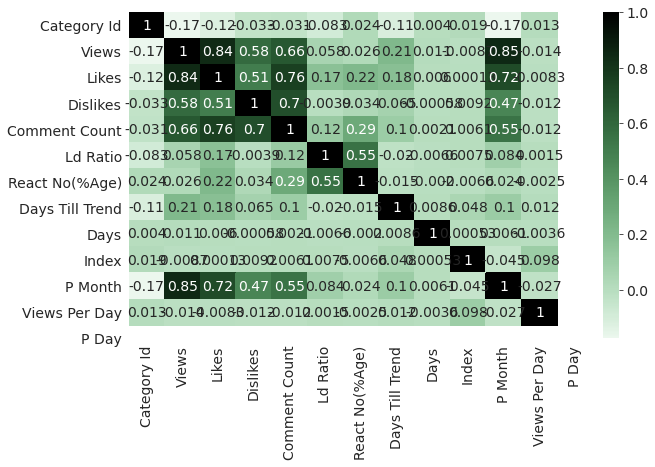

In [58]:

h_labels = [x.replace('_', ' ').title() for x in list(yt_trend_df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))

_ = sns.heatmap(yt_trend_df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=False, as_cmap=True), ax=ax)

## Average days to reach trending.

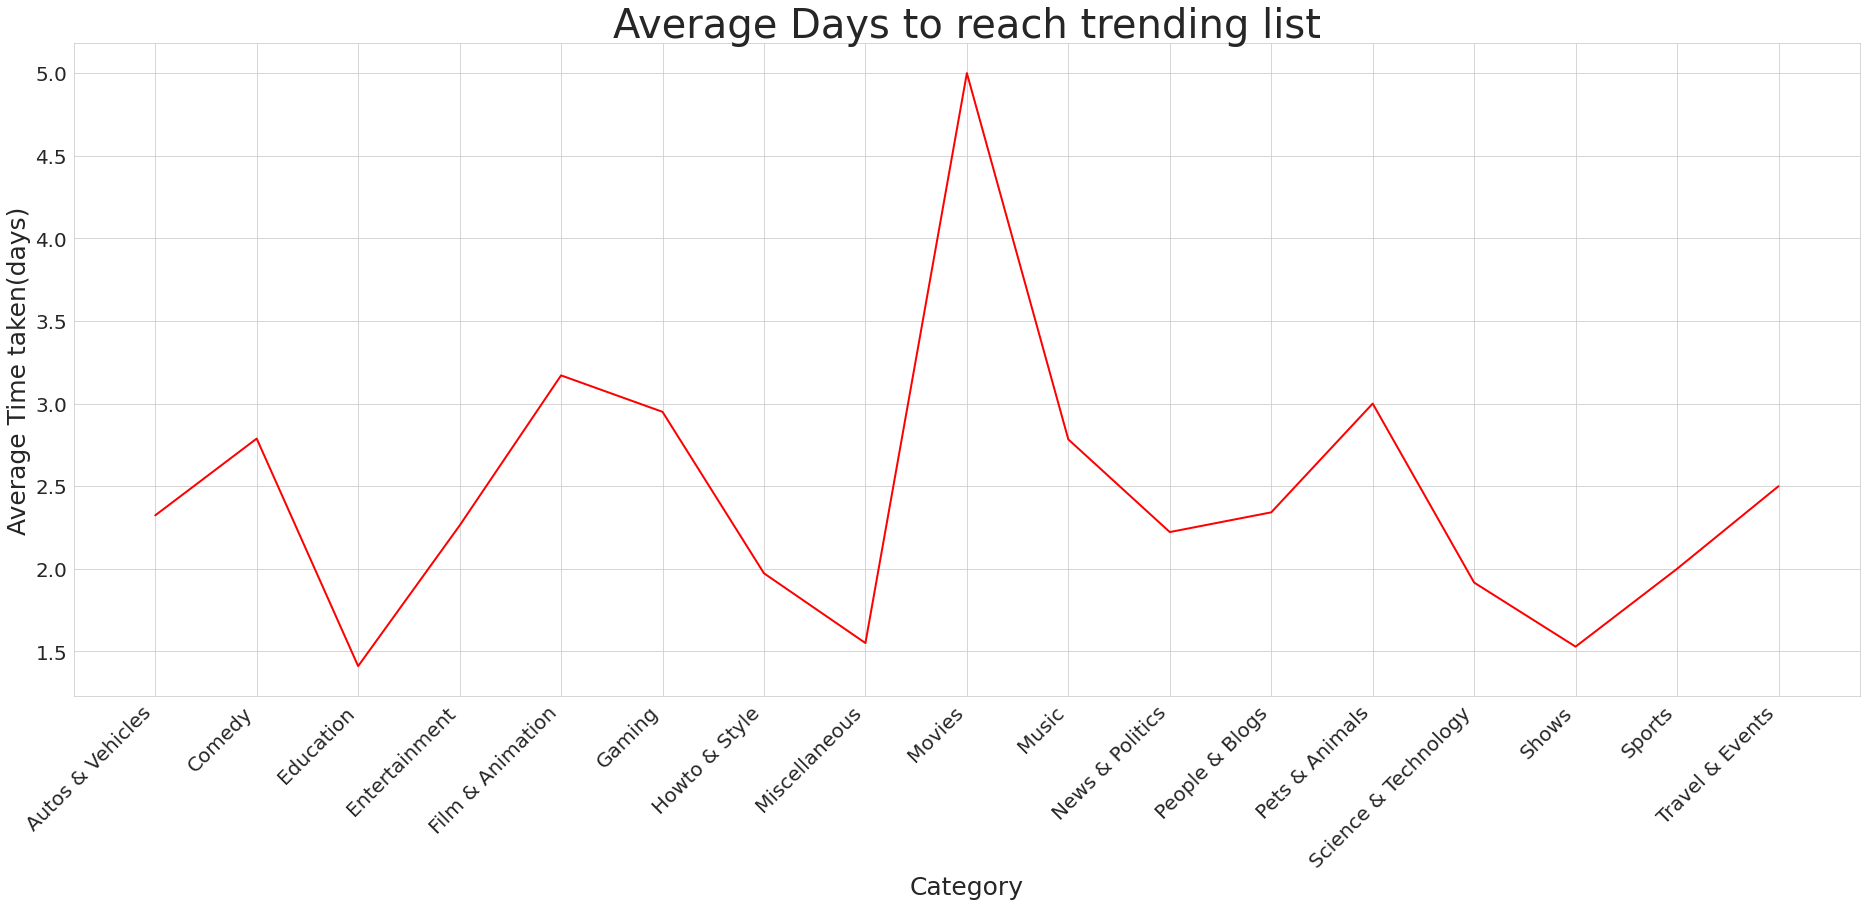

In [59]:
df_t = pd.DataFrame(yt_trend_df['days'].groupby(yt_trend_df['category']).mean())
plt.figure(figsize = (32,12))
plt.plot(df_t, color='red' ,linewidth=2)
plt.title("Average Days to reach trending list", fontsize=40)
plt.xlabel('Category',fontsize=25)
plt.ylabel('Average Time taken(days)',fontsize=25)
plt.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')
plt.show();

## Plot between logs of likes and dislikes to see the general trend

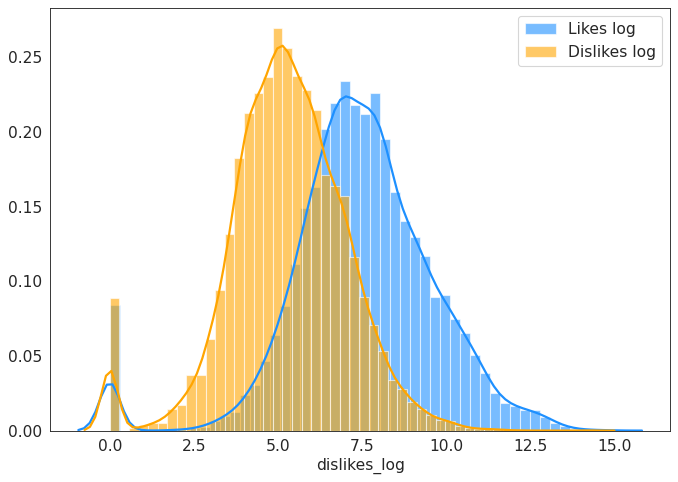

In [81]:
sns.set_style("white")
yt_trend_df['likes_log']    = np.log(yt_trend_df['likes'] + 1)

yt_trend_df['dislikes_log'] = np.log(yt_trend_df['dislikes'] + 1)

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(yt_trend_df.likes_log, color="dodgerblue", label="Likes log", **kwargs)
sns.distplot(yt_trend_df.dislikes_log, color="orange", label="Dislikes log", **kwargs)

plt.legend();

In [87]:
import jovian

In [88]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rijulbathla8/youtube-trending-videos-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rijulbathla8/youtube-trending-videos-analysis


'https://jovian.ml/rijulbathla8/youtube-trending-videos-analysis'

## Asking and Answering Questions

I try to find the answers for some questions



#### Q1: Which are the most liked and most disliked videos in this dataset?

In [68]:
cols = ['title','channel_title','category','trending_date','publish_time','views','likes','dislikes','comment_count','days_till_trend','views_per_day']
columns_df = yt_trend_df[cols] 

In [70]:
blankIndex = [''] * len(columns_df)
columns_df.index = blankIndex

Top 5 Most viewed videos that were in the trending list.

In [63]:
columns_df.sort_values('views',ascending=False).head(5)

,title,channel_title,category,trending_date,publish_time,views,likes,dislikes,days_till_trend,views_per_day
4098,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,17.12.12,2017-12-06,125432237,2912710,1545017,6 days,2.090537e+07
1778,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,17.07.12,2017-11-29,89930713,2606663,53011,8 days,1.124134e+07
14838,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,18.01.05,2018-04-24,53822757,1250535,44796,7 days,7.688965e+06
7068,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,18.22.03,2018-03-16,45064699,1494997,29812,6 days,7.510783e+06
14173,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,Entertainment,18.03.05,2018-04-24,44171797,780895,30791,9 days,4.907977e+06


Top 5 most liked videos that made it to the trending list.

In [65]:
liked_df = columns_df.sort_values('likes',ascending=False)
liked_df.head(5)

,title,channel_title,category,trending_date,publish_time,views,likes,dislikes,days_till_trend,views_per_day
4098,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,17.12.12,2017-12-06,125432237,2912710,1545017,6 days,2.090537e+07
1778,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,17.07.12,2017-11-29,89930713,2606663,53011,8 days,1.124134e+07
10575,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,18.18.01,2018-01-12,42019590,1804377,100033,6 days,7.003265e+06
679,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,17.15.11,2017-11-09,39082222,1721384,23137,6 days,6.513704e+06
14605,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,18.18.03,2018-03-12,43738208,1658756,94043,6 days,7.289701e+06


Top 5 most disliked videos that made it to the trending list.

In [66]:
disliked_df = columns_df.sort_values('dislikes',ascending=False)
disliked_df.head(5)

,title,channel_title,category,trending_date,publish_time,views,likes,dislikes,days_till_trend,views_per_day
4098,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,17.12.12,2017-12-06,125432237,2912710,1545017,6 days,2.090537e+07
15636,Race 3 | Official Trailer | Salman Khan | Remo...,Salman Khan Films,Entertainment,18.23.05,2018-05-15,29437104,564399,182589,8 days,3.679638e+06
12407,Logan Paul - SANTA DISS TRACK (Official Music ...,Logan Paul Vlogs,Entertainment,17.14.12,2017-12-10,11767339,882821,117842,4 days,2.941835e+06
3427,"Selfish Song Video - Race 3 | Salman Khan, Bob...",Tips Official,Music,18.30.05,2018-05-25,16169625,215228,114882,5 days,3.233925e+06
8483,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,Music,17.23.12,2017-12-20,12023527,519160,101457,3 days,4.007842e+06


Top 5 most commented videos that made it to the trending list.

In [71]:
columns_df.sort_values('comment_count',ascending=False).head(5)

,title,channel_title,category,trending_date,publish_time,views,likes,dislikes,comment_count,days_till_trend,views_per_day
,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,17.12.12,2017-12-06,125432237,2912710,1545017,807558,6 days,2.090537e+07
,OnePlus 6 Top Features and GIVEAWAY 🔥- OnePlus...,Technical Guruji,Science & Technology,18.04.06,2018-06-01,1158291,370533,2519,382685,3 days,3.860970e+05
,Samsung Galaxy J6 Unboxing and Giveaway 🔥🔥🔥,Technical Guruji,Science & Technology,18.25.05,2018-05-21,2630109,402773,6780,377912,4 days,6.575272e+05
,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,17.07.12,2017-11-29,89930713,2606663,53011,347982,8 days,1.124134e+07
,Samsung Galaxy S9 Top Features and Tips Tricks...,Technical Guruji,Science & Technology,18.14.04,2018-04-12,921731,252602,2006,295139,2 days,4.608655e+05


#### Q2: Which are the Most loved videos in the trending list?
Top 5 videos with most likes(more than one million) and least dislikes in the trending list. 

In [89]:
res1 = liked_df[liked_df.likes>1000000] 
res1.sort_values('dislikes',ascending=True).head(5) 

,title,channel_title,category,trending_date,publish_time,views,likes,dislikes,days_till_trend,views_per_day
7590,BB Ki Vines- | The Sacrifice |,BB Ki Vines,Entertainment,18.15.04,2018-04-09,7769007,1084173,9373,6 days,1.294834e+06
679,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,17.15.11,2017-11-09,39082222,1721384,23137,6 days,6.513704e+06
11857,Ed Sheeran - Happier (Official Video),Ed Sheeran,Music,18.02.05,2018-04-27,23543061,1095526,23886,5 days,4.708612e+06
4960,ZAYN - Let Me (Official Video),ZaynVEVO,Music,18.18.04,2018-04-12,22769424,1059309,24724,6 days,3.794904e+06
7068,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,18.22.03,2018-03-16,45064699,1494997,29812,6 days,7.510783e+06


#### Q3: Which are the Most hated videos in the trending list?
Top videos with most dislikes(more than 50k) and least likes in the trending list. 

In [75]:
res2 = disliked_df[disliked_df.dislikes>50000]

res2.sort_values('likes',ascending=True).head(5)

,title,channel_title,category,trending_date,publish_time,views,likes,dislikes,days_till_trend,views_per_day
3427,"Selfish Song Video - Race 3 | Salman Khan, Bob...",Tips Official,Music,18.30.05,2018-05-25,16169625,215228,114882,5 days,3.233925e+06
10420,Allah Duhai Hai Song Video - Race 3 | Salman K...,Tips Official,Music,18.07.06,2018-06-01,18904020,296229,83691,6 days,3.150670e+06
13791,Baaghi 2: Ek Do Teen Song | Jacqueline Fernand...,T-Series,Music,18.24.03,2018-03-19,29503026,320346,80059,5 days,5.900605e+06
11978,"Heeriye Song Video - Race 3 | Salman Khan, Jac...",Tips Official,Music,18.24.05,2018-05-18,25952473,455361,71793,6 days,4.325412e+06
8573,Kaala (Tamil) - Official Teaser | Rajinikanth ...,Wunderbar Studios,Film & Animation,18.09.03,2018-03-01,18877505,467498,60323,8 days,2.359688e+06


#### Q3: Which are the videos with the best like dislikes ratio?

In [90]:
best_ld_df = yt_trend_df.sort_values('ld_ratio',ascending=False).head(5)
best_ld_df['title']

441      Yaare Nee Mohini - Episode 114  - February 22,...
9635     Watch: Green corridor for ambulance carrying c...
13967    Bramhagantu - Episode 207  - February 21, 2018...
9821     Subbalakshmi Samsara - ಸುಬ್ಬಲಕ್ಷ್ಮಿ ಸಂಸಾರ | Ep...
1898     Anjali - अंजली - Episode 292  - May 14, 2018 -...
Name: title, dtype: object

#### Q4: Which are the most reacted videos?

In [91]:
most_rct_df = yt_trend_df.sort_values('react_no(%age)',ascending=False).head(5)
most_rct_df['title']

7835     OnePlus 6 Top Features and GIVEAWAY 🔥- OnePlus...
4366     Samsung Galaxy S9 Top Features and Tips Tricks...
14891    Oneplus 5T Lava Red Unboxing and Giveaway 🔥🔥🔥 ...
482      OnePlus 5T Star Wars Limited Edition Unboxing ...
6243     Xiaomi Redmi 5A Unboxing & initial impressions...
Name: title, dtype: object

This could be due to the reason that these channel had the reward as giveaways which attracted large number of reactions from people. 

#### Q5: Which is the most liked category ?

In [100]:
liked_category = yt_trend_df.groupby('category').count().sort_values('category',ascending=False)
liked_category

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,...,p_date,t_date,days_till_trend,days,index,p_month,views_per_day,p_day,likes_log,dislikes_log
category,,,,,,,,,,,,,,,,,,,,,
Travel & Events,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Sports,347,347,347,347,347,347,347,347,347,347,...,347,347,347,347,347,347,347,347,347,347
Shows,121,121,121,121,121,121,121,121,121,121,...,121,121,121,121,121,121,121,121,121,121
Science & Technology,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
Pets & Animals,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
People & Blogs,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,...,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232
News & Politics,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505,...,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505
Music,1213,1213,1213,1213,1213,1213,1213,1213,1213,1213,...,1213,1213,1213,1213,1213,1213,1213,1213,1213,1213
Movies,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [103]:
yt_trend_df["category"].value_counts()

Entertainment           7547
News & Politics         2505
People & Blogs          1232
Music                   1213
Comedy                  1114
Education                798
Film & Animation         522
Howto & Style            478
Sports                   347
Science & Technology     300
Shows                    121
Miscellaneous             69
Autos & Vehicles          34
Gaming                    20
Travel & Events            4
Movies                     2
Pets & Animals             1
Name: category, dtype: int64

#### Entertainment is the most popular category with 7547 videos that reached trending list.

In [101]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Inferences and Conclusion

YouTube is very data rich platform with tons of data flowing every second. It should be analysed to make better decisions for both the users and the content providers. 

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

There are a number of ways in which this analysis could move forward. It could be combined with other datasets to produce more inferences and results.

In [94]:
import jovian

In [95]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rijulbathla8/youtube-trending-videos-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rijulbathla8/youtube-trending-videos-analysis


'https://jovian.ml/rijulbathla8/youtube-trending-videos-analysis'

# Links
https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/